# CLASSIFICATION OF IRIS DATASET

In [26]:
#WORKING WITH IRIS DATA SET

from sklearn import datasets
iris= datasets.load_iris()
x_iris,y_iris=iris.data,iris.target
#print(x_iris)
#rint(y_iris)



Learning the parameters of a prediction function and testing it on the same data is a methodological mistake:
a model that would just repeat the labels of the samples that it has just seen would have a perfect score
but would fail to predict anything useful on yet-unseen data.
This situation is called overfitting.

sklearn.model_selection.train_test_split(*arrays, **options)[source]  :

Split arrays or matrices into random train and test subsets





In [21]:
#evaluation of the dataset

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
#get the data from first two coloumns of the given test dat

x,y=x_iris[:, :2],y_iris
#split data into test and training datasets 30% for testing and random_state of 40%

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=40)
print(x_train.shape)

(105, 2)


Standardizing the features 

Standardize features by removing the mean and scaling to unit variance
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data 
(e.g. Gaussian with 0 mean and unit variance).

These three lines of the previous code modify the training set in a process usually called feature scaling.
#For each feature, calculate the average, subtract the mean
#value from the feature value, and divide the result by their standard deviation.

In [22]:
#stardardize

scaler=preprocessing.StandardScaler().fit(x_train)#fit used to feed the trainer
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)



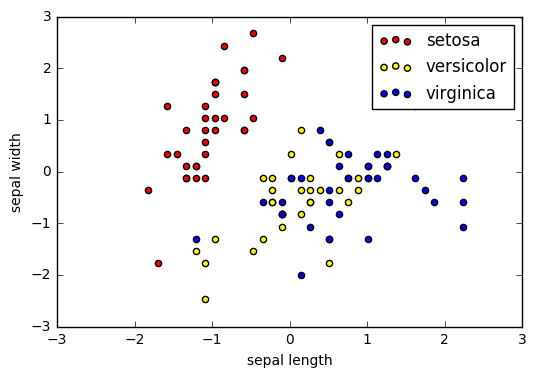

In [23]:
#visualisation of the training datasets
import matplotlib.pyplot as plt
colors=['red','yellow','blue']
for i in range(len(colors)):
    xs=x_train[:, 0][y_train==i]
    ys=x_train[:, 1][y_train==i]
    #yz=x_train[:, 2][y_train==i]
    plt.scatter(xs,ys,c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


If we look at the picture, it seems that we could draw a straight line that correctly
separates both the sets (perhaps with the exception of one or two dots, which
could lie in the incorrect side of the line). This is exactly what our first classification
method, linear classification models, tries to do: build a line (or, more generally, a
hyperplane in the feature space) that best separates both the target classes, and use
it as a decision boundary (that is, the class membership depends on what side of the
hyperplane the instance is).

# SGD LINEAR CLASSIFICATION

find the local minimum of a function (in this case, the loss function, which
measures how far every instance is from our boundary). The algorithm will learn the
coefficients of the hyperplane by minimizing the loss function.

To use any method in scikit-learn, we must first create the corresponding classifier
object, initialize its parameters, and train the model that better fits the training data.

>>> from sklearn.linear_modelsklearn._model import SGDClassifier
>>> clf = SGDClassifier()
>>> clf.fit(X_train, y_train)

The SGDClassifier initialization function allows several parameters.

The fit:
function is probably the most important one in scikit-learn. It receives the training
data and the training classes, and builds the classifier. Every supervised learning
method in scikit-learn implements this function.

### For linear Classification:

The coef_ attribute of the clf object (consider, for
the moment, only the first row of the matrices), now has the coefficients of the linear
boundary 
and the intercept_ attribute, the point of intersection of the line with the y axis.

In [27]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(x_train, y_train)
print(clf.coef_)

print(clf.intercept_)



[[-33.40370655  18.58503794]
 [ -1.61519189 -13.79643429]
 [ 19.38230267  -1.53293714]]
[-20.79264108  -2.20547028  -2.29236365]


-17.62477802 - 28.53692691 * x1 + 15.05517618 * x2 = 0

Now, given x1 and x2 (our real-valued features), we just have to compute the value
of the left-side of the equation: if its value is greater than zero, then the point is
above the decision boundary (the red side), otherwise it will be beneath the line (the
green or blue side). Our prediction algorithm will simply check this and predict the
corresponding class for any new iris flower.